In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Part 1 : Prepare the data

In [3]:
df = pd.read_csv('Myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [7]:
df.shape

(618, 14)

In [5]:
#Remove the "MYOPIC" column from the dataset.
df = df.drop('MYOPIC', axis=1)

In [8]:
#Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

#Create a scaler to standardize the data
scaler = StandardScaler()

# Train the scaler with the data.
X_scaled = scaler.fit_transform(df)

### Part 2: Apply Dimensionality Reduction

In [9]:
#Perform dimensionality reduction with PCA.
#preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components=0.9)

#Get the principal components for the X_train_scaled
df_pca = pca.fit_transform(X_scaled)

#Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [16]:
print("the shape of df before pca :", df.shape)
print("the shape of df after pca :", df_pca.shape)

the shape of df before pca : (618, 14)
the shape of df after pca : (618, 10)


In [17]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
#Initialize the t-SNE model
tsne = TSNE(n_components=2, verbose=1, random_state=123)
#Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)

C:\Users\uninfor\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\uninfor\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.004s...
[t-SNE] Computed neighbors for 618 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.301571
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.593140
[t-SNE] KL divergence after 1000 iterations: 1.153272


In [18]:
# Get the shape of features after reduction
tsne_features.shape

(618, 2)

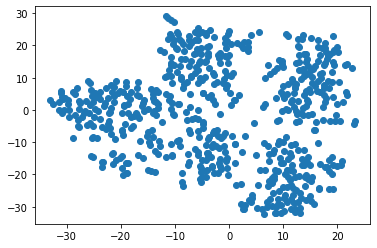

In [22]:
X = tsne_features[:,0]
y = tsne_features[:,1]
#myopia_data["Myopic"] = df["MYOPIC"]

plt.scatter(X, y)
plt.show()

### Part 3: Perform a Cluster Analysis with K-means

In [26]:
#Create an elbow plot to identify the best number of clusters.

# Use a for loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\uninfor\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


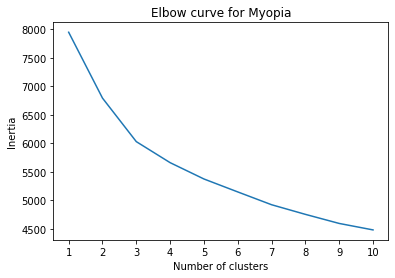

In [25]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()